# WORD 2 VEC

In [ ]:
# to read and manipulate data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expresssions for manipulation text data
import re

In [2]:
# nlp
import nltk
nltk.download('stopwords') # loading the stopwords
nltk.download('wordnet') # loading the wordnet models that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to remove stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of words
from sklearn.feature_extraction.text import CountVectorizer

# to imoprt Word2Vec
from gensim.models import Word2Vec

#to split data into train and test data
from sklearn.model_selection import train_test_split

# to build a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evalute the model
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/proximus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/proximus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# to compute metrics to evalute the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# to tune different models
from sklearn.model_selection import GridSearchCV

In [4]:
reviews = pd.read_csv("data/Product_Reviews.csv")

data = reviews.copy()

In [5]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

In [6]:
data.shape

(1007, 3)

In [7]:
data.isnull().sum()

Product ID        0
Product Review    0
Sentiment         0
dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

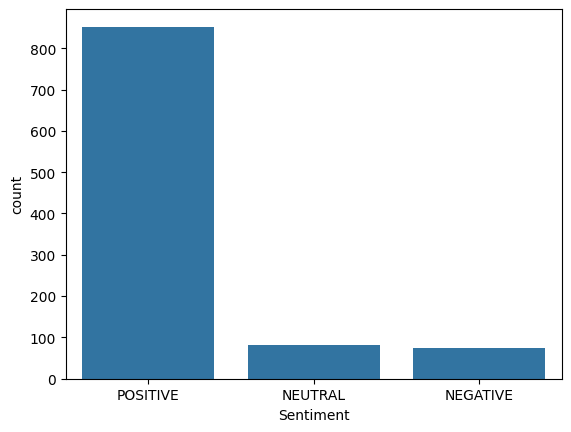

In [8]:
sns.countplot(data=data, x='Sentiment')

In [9]:
data['Sentiment'].value_counts(normalize=True)

Sentiment
POSITIVE    0.846077
NEUTRAL     0.080437
NEGATIVE    0.073486
Name: proportion, dtype: float64

Removing special Characters from the text

In [10]:
# defining a function to remove special characters
import re

def remove_special_characters(text):
    if not isinstance(text, str):
        return ""
    # keep alphanumerics and spaces; remove the rest
    pattern = r"[^A-Za-z0-9\s]"
    new_text = re.sub(pattern, "", text)
    return new_text

data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyageFortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentIts been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingAlso glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 Ive read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirsFast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit Im in love Not just with the Kind

In [11]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

data.loc[0:3, ['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 ive read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirsfast forward to today i have had a full week with my new kindle paperwhite and i have to admit im in love not just with the kind

Removing extra Whitespaces

In [12]:
# removing extra whitespaces from the text
# First strip leading/trailing spaces then collapse internal multiple spaces to single
data['cleaned_text'] = data['cleaned_text'].fillna("").str.strip()
data['cleaned_text'] = data['cleaned_text'].str.replace(r"\s+", " ", regex=True)
data.loc[0:3, ['cleaned_text']]

,cleaned_text
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 ive read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirsfast forward to today i have had a full week with my new kindle paperwhite and i have to admit im in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 13900 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazoni have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as wellmake yourself happy inspire the reader inside of you
2,i am enjoying it so far great for reading had the original fire since 2012 the fire used to make my eyes hurt if i read too long havent experienced that with the paperwhite yet
3,i bought one of the first paperwhites and have been very pleased with it its been a constant companion and i suppose ive read on average a book every three days for the past however many years on it i wouldnt give it up youd have to pry it from my cold dead fingersfor sundry logistical reasons ive also made good use of amazons kindle app on my iphone no paperwhite screen naturally and all the cool usability that delivers but it works well and has its own attractions as a companion to the kindleof course there are aspects of the paperwhite which i would like to critique ah you knew that was coming somewhere didnt youas a member of bookbub i get a daily list of alerts and book deals in my chosen genres i take on many of them however ive found that even with the best will in the world i cant keep up some days it seems that for every book i read ive bought two theres just so much good stuff out there the accumulative effect of this is that the number of books actually on my paperwhite has been creeping ever upward for some time its now at about 400with this in mind ive noticed that while pageturning has remained exactly the same just about every other action on the kindle has become positively glacial not just very slow but so slow you think its malfunctioning the general consensus appears to be that its to be expected once one has that many books downloaded onto a kin

In [13]:
# cache stopwords set once for efficiency
_stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    # removing English language stopwords
    return ' '.join([word for word in words if word not in _stopwords])

In [14]:
# applying the functions to remove stopwords using the NLTK Library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)
# show a preview of original vs cleaned vs no-stopwords
data.loc[0:3, ['Product Review', 'cleaned_text', 'cleaned_text_without_stopwords']]

,Product Review,cleaned_text,cleaned_text_without_stopwords
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyagefortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyages page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Ki

In [15]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')  # open multilingual wordnet package: adds language translation, richer word forms

lemmatizer = WordNetLemmatizer()

# defining a function to perform lemmatization
def apply_lemmatizer(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    # applying the lemmatizer on every word of a message and joining back into a single string
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# create a lemmatized version (optional)
data['lemmatized_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatizer)
data.loc[0:3, ['cleaned_text_without_stopwords', 'lemmatized_text']]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/proximus/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,cleaned_text_without_stopwords,lemmatized_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyagefortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyages page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyagefortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 ive read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten theirsfast forward today full week new kindle paperwhite admit im love kindle reading let relate review love reading back kindle investment 13900 experience receive buy kindle simply paying screen entire experience included buying amazoni reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left wellmake happy inspire reader inside,allow preface little history casual reader owned nook simple touch 2011 ive read harry potter series girl dragon tattoo series 1984 brave new world key title fair say nook get much use many others may gotten theirsfast forward today full week new kindle paperwhite admit im love kindle reading let relate review love reading back kindle investment 13900 experience receive buy kindle simply paying screen entire experience included buying amazoni reading hunger game trilogy shall moving onto divergent series soon thing nook hindered past 4 year never inspired pick get hand dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded book ton reading still half battery left wellmake happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long havent experienced paperwhite yet,enjoying far great reading original fire since 2012 fire used make eye hurt read long havent experienced paperwhite yet
3,bought one first paperwhites pleased constant companion suppose ive read average book every three days past however many years wouldnt give youd pry cold dead fingersfor sundry logistical reasons ive also made good use amazons kindle app iphone paperwhite screen naturally cool usability delivers works well attractions companion kindleof course aspects paperwhite would like critique ah knew coming somewhere didnt youas member bookbub get daily list alerts book deals chosen genres take many however ive found even best world cant keep days seems every book read ive bought two theres much good stuff accumulative effect number books actually paperwhite creeping ever upward time 400with mind ive noticed pageturnin

In [16]:
# Initalizing CountVectorizer with top 1000 words 
bow_vec = CountVectorizer(max_features=1000)

# applying countVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['lemmatized_text']) 
data_features_BOW = data_features_BOW.toarray()

# shape of the feature vector
print("Shape of the feature vector", data_features_BOW.shape)

# getting the 1000 words considered by the bow model 
words = bow_vec.get_feature_names_out()

print("First 10 words : ", words[:10])
print("last 10 words", words[-10:])


df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

Shape of the feature vector (1007, 1000)
First 10 words :  ['10' '100' '139' '15' '16' '16level' '20' '2013' '2014' '2015']
last 10 words ['wouldnt' 'write' 'writing' 'wrong' 'year' 'yes' 'yet' 'youll' 'youre'
 'youtube']


,10,100,139,15,16,16level,20,2013,2014,2015,...,wouldnt,write,writing,wrong,year,yes,yet,youll,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Example CBOW
# Note-
  # sg=0 → model is trained to predict target word from context (CBOW)
  # sg=1 → model is trained to predict context words from target (Skip-gram)


from gensim.models import Word2Vec

# Define corpus
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]



# CBOW model (sg=0 for CBOW, sg=1 for skip-gram)
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)
"""
PARAMETERS:
1. vector_size=10
What it means: Number of dimensions in the word vector.
Example: "cat" → [0.12, -0.56, 0.91, ...] (10 numbers)
Tip: Bigger vectors can store more meaning but need more data & computation.

2. window=2
What it means: How many words before & after the target word are considered context.
Example: In "The cat sat on the mat",
if target = "sat", window=2 → context = "cat", "on", "the", "mat".
Tip:
Small window → local grammar relationships
Large window → broader semantic relationships

3. min_count=1
What it means: Minimum word frequency to be included in the vocabulary.
Example:
min_count=1 → keep all words (good for small datasets)
min_count=5 → ignore words that appear fewer than 5 times (good for large datasets).
Tip: Helps remove rare, noisy words in big corpora.

4. sg=0 or sg=1
What it means: Chooses the training algorithm.
sg=0 → CBOW (predict target word from context)
sg=1 → Skip-gram (predict context words from target)
Example:
CBOW: "cat", "on" → "sat"
Skip-gram: "sat" → "cat", "on"
Tip:
CBOW is faster & works well with frequent words.
Skip-gram is slower but works better with rare words.

5. workers
What it means: Number of CPU threads to use in training.
Word2Vec can process multiple parts of the training data in parallel to speed things up.
Example:
workers=1 → use only 1 CPU core (slower, but deterministic results)
workers=4 → use 4 CPU cores (faster)
Tip:
On your personal machine, you can set it to the number of cores you have.
On Colab / Jupyter with small datasets, it won’t matter much — but for huge corpora, it makes training much faster."""

# Vector for a word
print("Vector for 'dog':")
print(cbow_model.wv['dog'])

# Similar words to 'dog'
print("\nWords similar to 'dog' and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('dog'))


Vector for 'cat':
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]

Words similar to 'cat'and the cosine of angles between those vectors:
[('on', 0.6144058108329773), ('dogs', 0.3862057328224182), ('are', 0.22020897269248962), ('mat', 0.19734422862529755), ('friends', 0.1793583631515503), ('ball', 0.16644792258739471), ('puppy', 0.12152033299207687), ('kitten', 0.11524320393800735), ('cats', -0.04264536499977112), ('played', -0.08937527984380722)]


In [22]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


# Step 1 — Tokenize the text
sentences = data['lemmatized_text'].apply(lambda x: x.split())  # assuming text is already cleaned

# Step 2 — Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=100,  # length of each word vector
    window=3,         # context window size
    min_count=5,      # include all words
    sg=0,             # CBOW
    workers=4         # CPU cores to use
)

# Step 3 — Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=3,
    min_count=5,
    sg=1,             # Skip-gram
    workers=4
)

# Step 4 — Function to get sentence vectors
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)  # handle empty sentences
    return np.mean(word_vecs, axis=0)

# Step 5 — Apply to dataset

# CBOW Vectors
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
# Skip-gram Vectors
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])

# Step 6 — Convert to DataFrames (optional)
df_cbow = pd.DataFrame(data_cbow_vectors)
df_skipgram = pd.DataFrame(data_skipgram_vectors)


In [ ]:
# Train Word2Vec model
from gensim.models import Word2Vec

sentences = data['tokens'].tolist()

# Filter out empty token lists to avoid issues
sentences = [s for s in sentences if isinstance(s, list) and len(s) > 0]

# Hyperparameters can be tuned; these are good starting points
w2v_params = dict(
    vector_size=100,  # embedding size
    window=5,         # context window
    min_count=2,      # ignore rare tokens
    workers=4,        # parallelism
    sg=1,             # 1: skip-gram, 0: CBOW
    negative=10,      # negative sampling
    epochs=10,        # training epochs
    seed=42,
)

w2v_model = Word2Vec(sentences=sentences, **w2v_params)

print(f"Vocab size: {len(w2v_model.wv)}")
print(w2v_model.wv.most_similar(w2v_model.wv.index_to_key[0])[:5])

In [ ]:
# Build document embeddings by averaging token vectors
import numpy as np

vector_size = w2v_model.wv.vector_size


def doc_vector(tokens):
    if not isinstance(tokens, list) or len(tokens) == 0:
        return np.zeros(vector_size, dtype=np.float32)
    vecs = [w2v_model.wv[t] for t in tokens if t in w2v_model.wv]
    if not vecs:
        return np.zeros(vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

X = np.vstack(data['tokens'].apply(doc_vector).values)
print("Embeddings shape:", X.shape)

# Keep reference to labels if available
y = None
if 'label_col' in globals() and label_col is not None and label_col in data.columns:
    y = data[label_col].values
    print("Label classes:", pd.Series(y).value_counts().to_dict())

In [ ]:
# Optional: Train/test a simple classifier if labels exist
if y is not None:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) > 1 else None
    )

    clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("No label column detected; skipping classifier training.")

In [ ]:
# Visualize a subset of Word2Vec embeddings with t-SNE and inspect similar words
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select top N frequent words from the model vocab
N = 150  # reduce if plot is cluttered
words = w2v_model.wv.index_to_key[:N]
vecs = np.vstack([w2v_model.wv[w] for w in words])

# Run t-SNE (perplexity should be < N)
tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=min(30, max(5, (N//3))))
coords = tsne.fit_transform(vecs)

plt.figure(figsize=(12, 10))
plt.scatter(coords[:,0], coords[:,1], s=18, alpha=0.7)
for i, w in enumerate(words):
    if i % 2 == 0:  # skip every other to reduce text clutter
        plt.text(coords[i,0]+0.5, coords[i,1]+0.5, w, fontsize=8)
plt.title('t-SNE projection of Word2Vec vocabulary subset')
plt.axis('off')
plt.show()

# Show similar words for a few seed terms if they exist
seed_terms = ['good', 'bad', 'great', 'poor', 'quality', 'price']
print('\nMost similar words:')
for term in seed_terms:
    if term in w2v_model.wv:
        print(f"\n{term}:")
        for w, score in w2v_model.wv.most_similar(term, topn=5):
            print(f"  {w:15s} {score:.3f}")
    else:
        print(f"\n{term}: (not in vocabulary)")